In [7]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
import os
os.getcwd()

'C:\\Users\\navee\\Desktop\\data science python\\machine learning'

In [9]:
df=pd.read_csv('C:\\Users\\navee\\Desktop\Credit Card Customer Data.csv')
df.head(20)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
5,6,58634,20000,3,0,1,8
6,7,48370,100000,5,0,11,2
7,8,37376,15000,3,0,1,1
8,9,82490,5000,2,0,2,2
9,10,44770,3000,4,0,1,7


In [23]:
df.groupby(["Avg_Credit_Limit",])["Total_Credit_Cards"].value_counts().unstack()

Total_Credit_Cards,1,2,3,4,5,6,7,8,9,10
Avg_Credit_Limit,,,,,,,,,,
3000,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
5000,5.0,6.0,1.0,3.0,1.0,1.0,4.0,NaN,NaN,NaN
6000,5.0,6.0,3.0,8.0,4.0,3.0,2.0,NaN,NaN,NaN
7000,3.0,4.0,1.0,8.0,2.0,4.0,2.0,NaN,NaN,NaN
8000,6.0,6.0,3.0,10.0,1.0,4.0,5.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
184000,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
186000,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
187000,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [25]:
df.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [27]:
df.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [31]:
df.drop(columns=["Sl_No","Customer Key"],inplace=True)

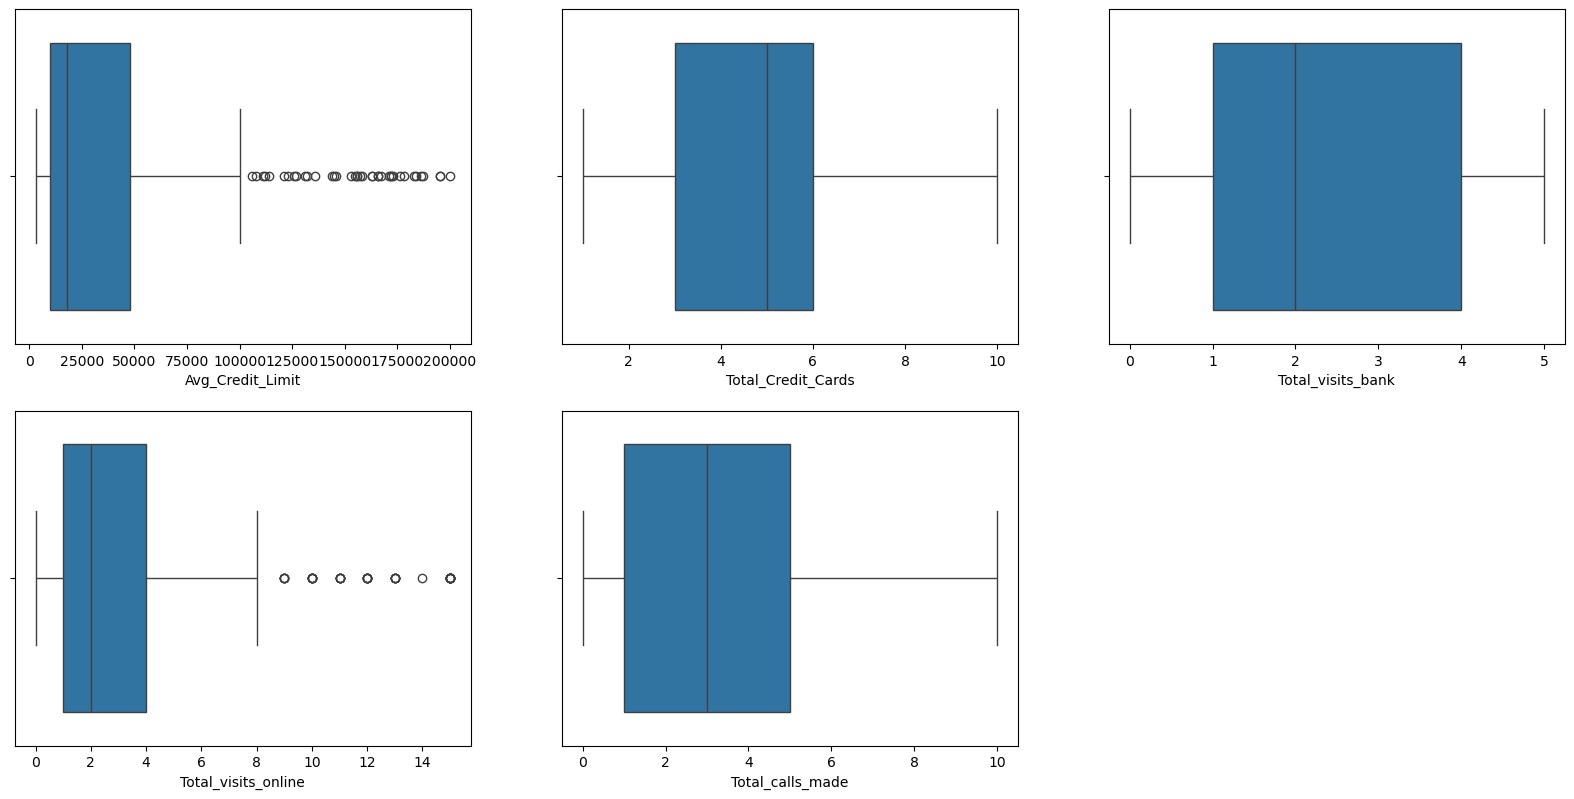

In [35]:
i=1
plt.figure(figsize=(20,20))
for j in df.columns:
    plt.subplot(4,3,i)
    sns.boxplot(data=df,x=j)
    i+=1

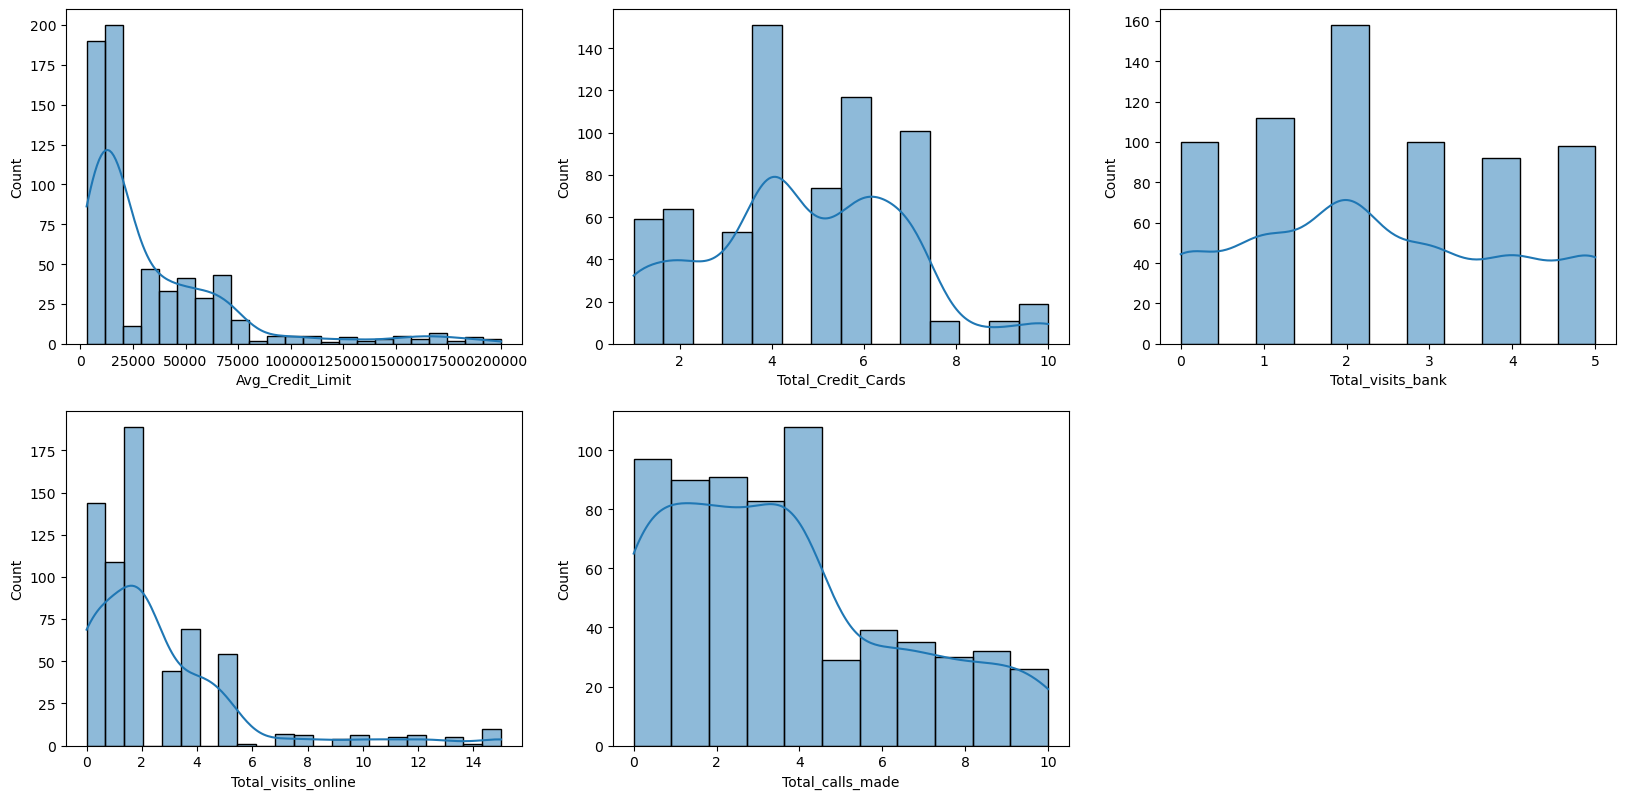

In [37]:
i=1
plt.figure(figsize=(20,20))
for j in df.columns:
    plt.subplot(4,3,i)
    sns.histplot(data=df,x=df[j],kde=True)
    i+=1

In [49]:
corr = df.corr()
corr

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Avg_Credit_Limit,1.000000,0.608860,-0.100312,0.551385,-0.414352
Total_Credit_Cards,0.608860,1.000000,0.315796,0.167758,-0.651251
Total_visits_bank,-0.100312,0.315796,1.000000,-0.551861,-0.506016
Total_visits_online,0.551385,0.167758,-0.551861,1.000000,0.127299
Total_calls_made,-0.414352,-0.651251,-0.506016,0.127299,1.000000


<Axes: >

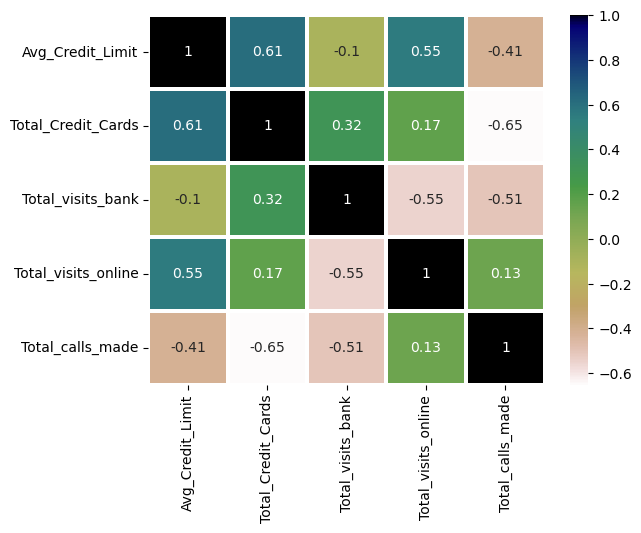

In [51]:
sns.heatmap(corr,cmap="gist_earth_r",linewidths=1.5,annot=True)

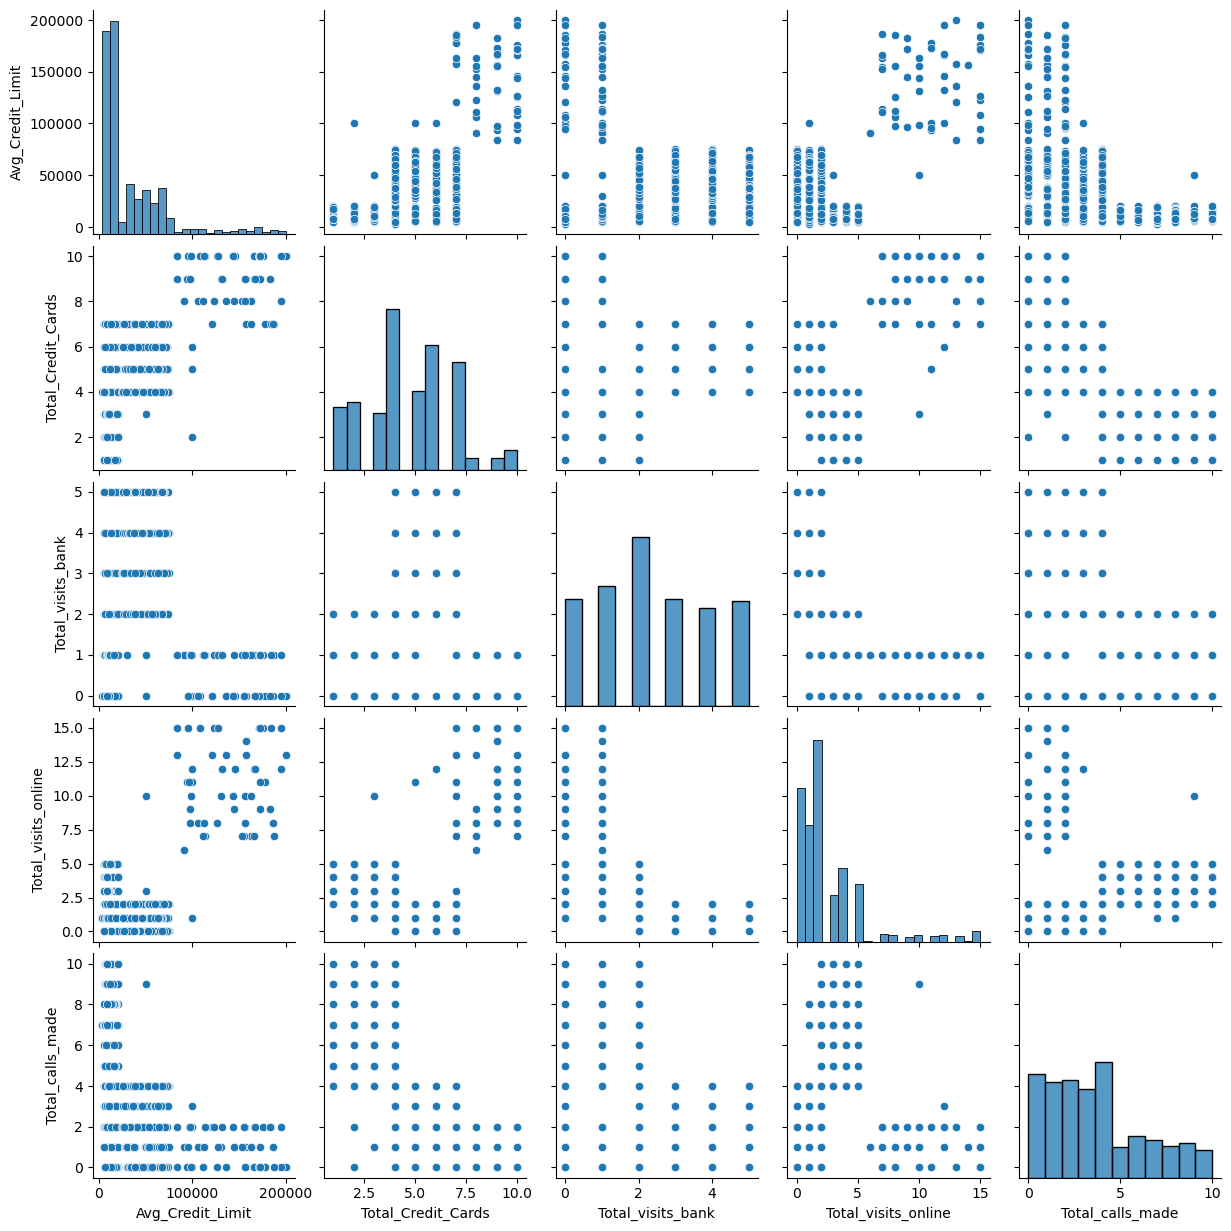

In [53]:
sns.pairplot(df)

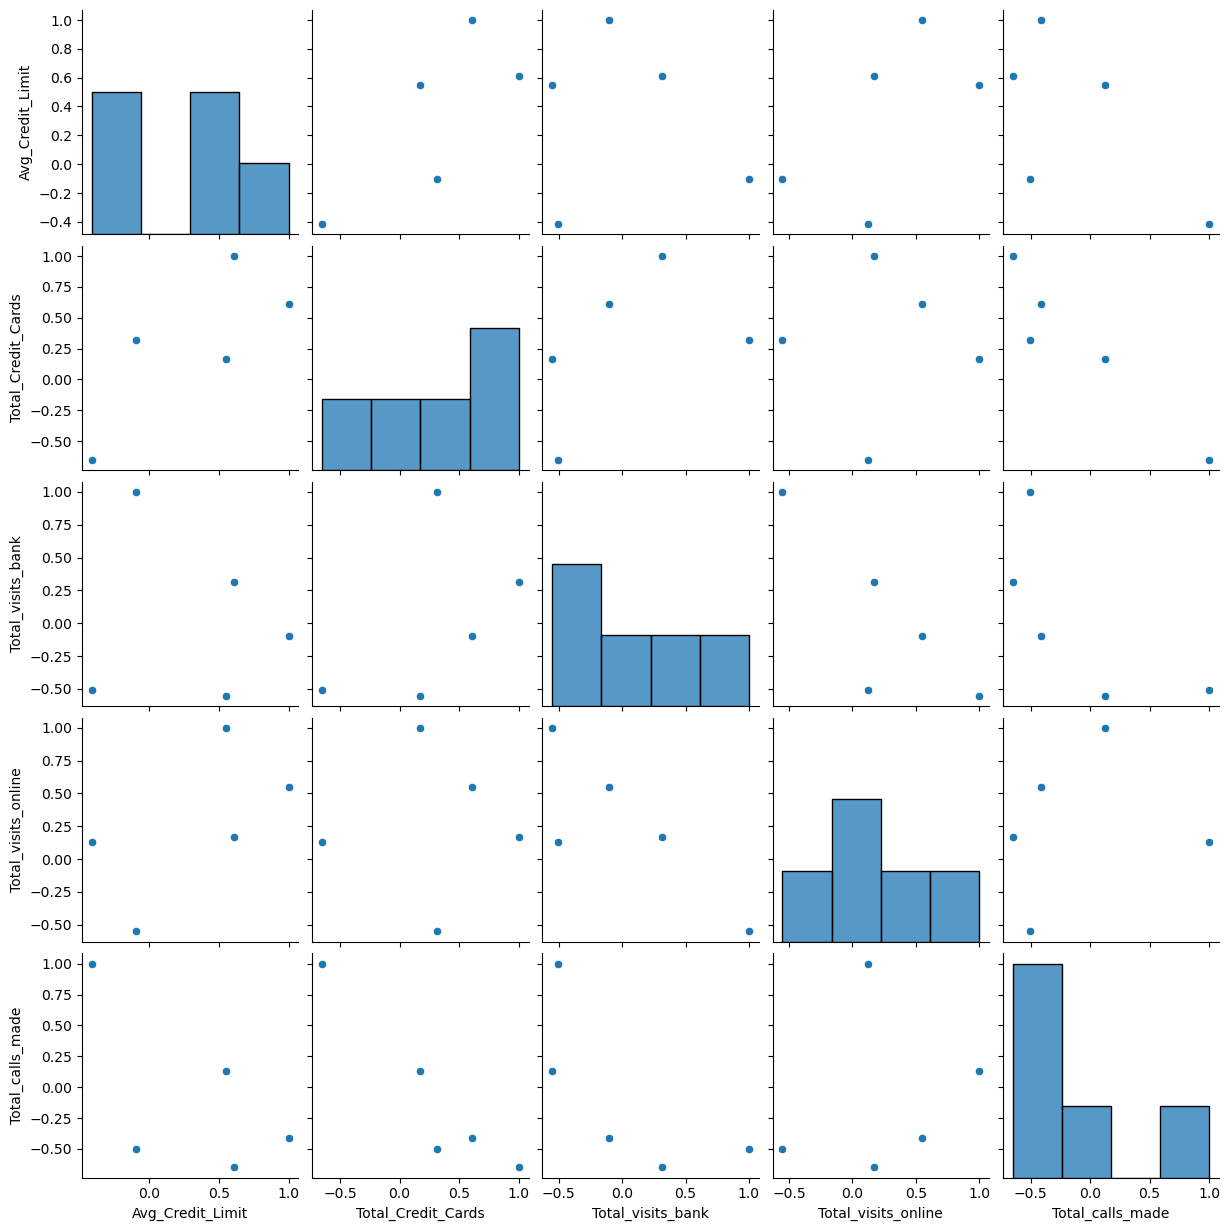

In [55]:
sns.pairplot(corr)

In [57]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_scaled = sc.fit_transform(df)

In [59]:
df_scaled

array([[ 1.74018685, -1.24922476, -0.86045063, -0.54748969, -1.25153737],
       [ 0.41029254, -0.78758515, -1.47373077,  2.5205186 ,  1.89185881],
       [ 0.41029254,  1.05897329, -0.86045063,  0.13428993,  0.1455276 ],
       ...,
       [ 2.93709172,  1.5206129 , -0.86045063,  2.17962879, -0.90227113],
       [ 3.65523464,  2.44389211, -0.86045063,  4.22496765, -1.25153737],
       [ 3.52224521,  1.9822525 , -1.47373077,  3.20229822, -0.55300488]])

In [61]:
df1 = pd.DataFrame(df_scaled,columns=df.columns)
df1

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739
...,...,...,...,...,...
655,1.713589,2.443892,-0.860451,2.520519,-1.251537
656,1.314621,2.443892,-0.860451,3.543188,-0.553005
657,2.937092,1.520613,-0.860451,2.179629,-0.902271
658,3.655235,2.443892,-0.860451,4.224968,-1.251537


In [68]:
from sklearn.metrics import silhouette_score

In [1]:
from sklearn.cluster import KMeans
wss=[]
for i in range (1,13):
     k=KMeans(n_clusters=i)
     k.fit(df1)
     wss.append(k.inertia_)

NameError: name 'df1' is not defined

In [76]:
slh_score = []
for i in range(2,13):
    k=KMeans(n_clusters=i)
    k.fit(df)
    slh_score.append(silhouette_score(df1,k.labels_))

Text(0, 0.5, 'wss')

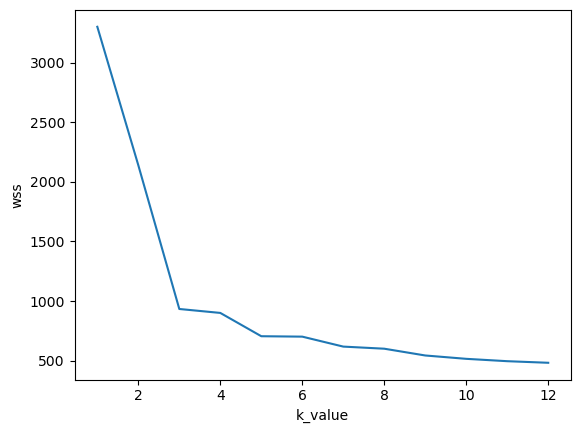

In [78]:
plt.plot(range(1,13),wss)
plt.xlabel("k_value")
plt.ylabel("wss")

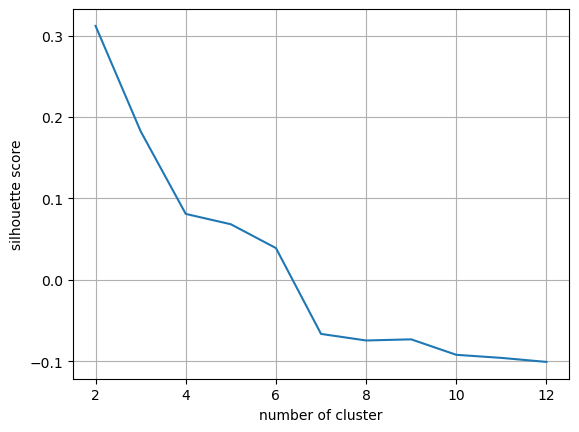

In [84]:
plt.plot(range(2,13),slh_score)
plt.xlabel("number of cluster")
plt.ylabel("silhouette score")
plt.grid(True)

In [86]:
k1 = KMeans(n_clusters=3)
k1.fit(df1)
y=k1.predict(df1)
df["label"] = y

In [88]:
df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,label
0,100000,2,1,1,0,0
1,50000,3,0,10,9,1
2,50000,7,1,3,4,0
3,30000,5,1,1,4,0
4,100000,6,0,12,3,2


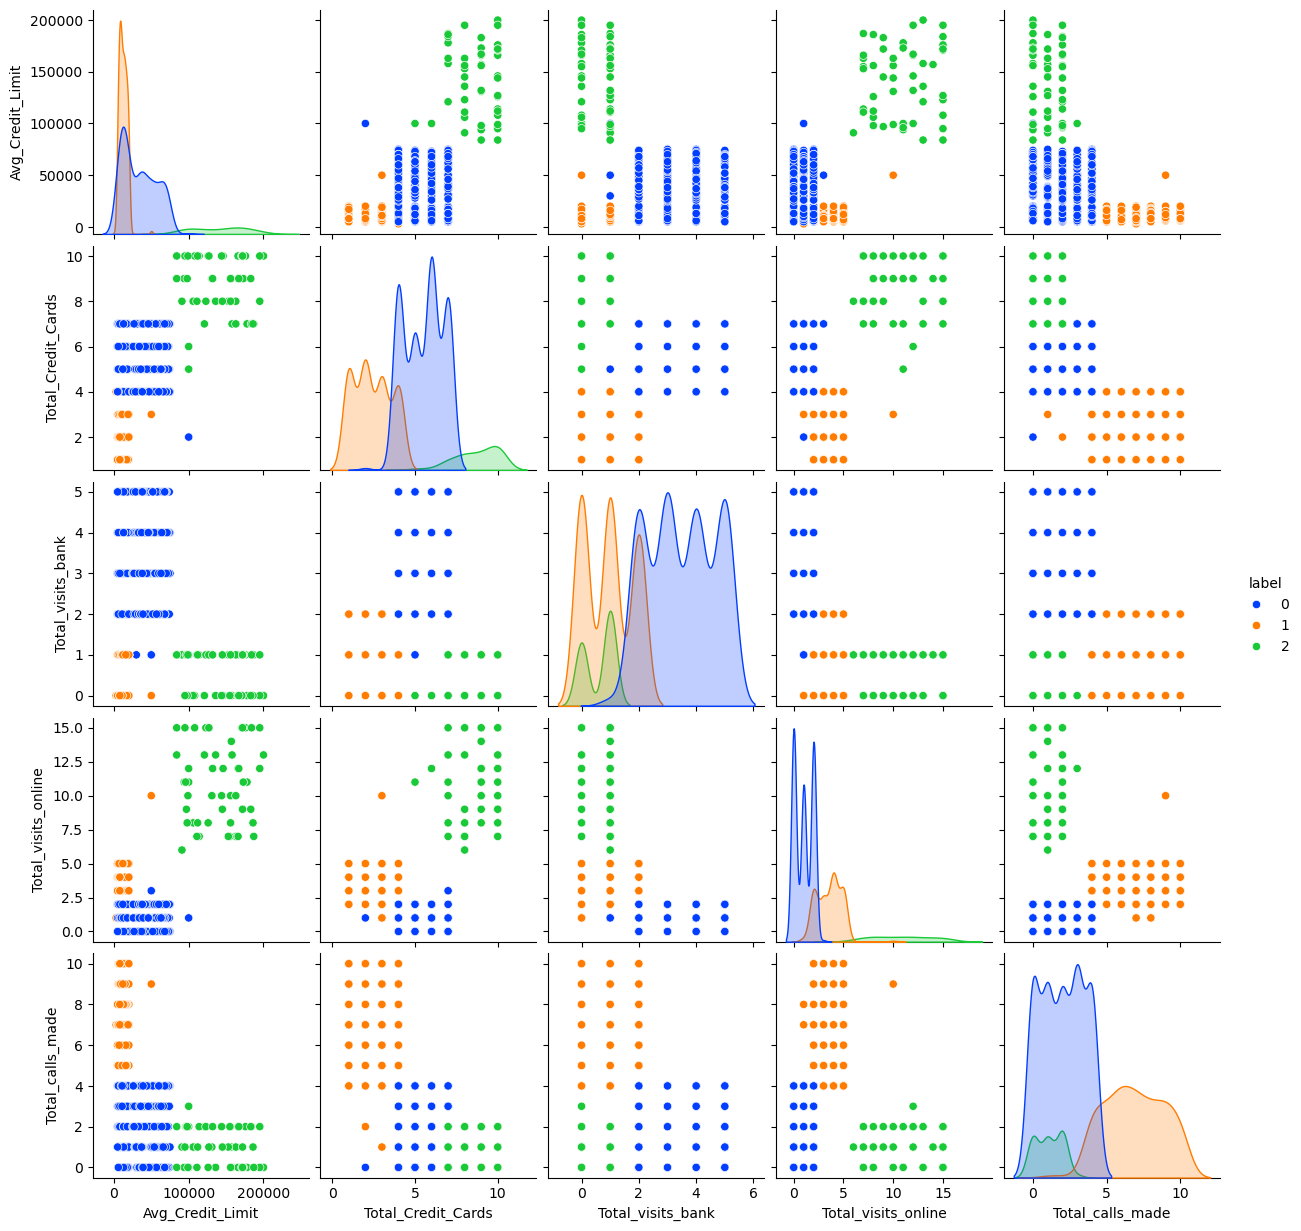

In [90]:
sns.pairplot(data=df,hue="label",palette="bright")

In [94]:
center = k1.cluster_centers_
center

array([[-0.02106178,  0.37368962,  0.6663945 , -0.55367163, -0.55300488],
       [-0.59579625, -1.05962278, -0.9015185 ,  0.32299678,  1.14810882],
       [ 2.83176409,  1.86222621, -1.10576269,  2.82731942, -0.87432983]])

In [96]:
kmShilouetteScore = silhouette_score(df1,k1.labels_)
kmShilouetteScore

0.5157182558881063